In [64]:
import numpy as np
import matplotlib.pyplot as plt

#@title Figure Settings
import ipywidgets as widgets
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/NMA2020/nma.mplstyle")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [65]:
#@title Helper functions
def my_plot_single(x, px, col, name):

    if px is None:
        px = np.zeros_like(x)

    fig, ax = plt.subplots()
    ax.plot(x, px, '-', color=col, LineWidth=2, label=name)
    ax.legend()
    ax.set_ylabel('Probability')
    ax.set_xlabel('Hypothesized stimulus S')

In [66]:
def my_gaussian(stim_x, mu, sigma):
    
    px = np.exp(- 1/2/sigma**2 * (stim_x - mu) ** 2)
    px = px / px.sum()

    return px

In [67]:
def compute_posterior_pointwise(prior, likelihood):

    posterior = prior * likelihood
    posterior /= np.sum(posterior)

    return posterior


def localization_simulation(mu_prior=0, sigma_prior=3,
                            mu_likelihood=2, sigma_likelihood=1.5):

    x = np.arange(-10, 10, 0.1)

    prior = my_gaussian(x, mu_prior, sigma_prior)
    likelihood = my_gaussian(x, mu_likelihood, sigma_likelihood)
    posterior = compute_posterior_pointwise(prior, likelihood)

    return x, prior, likelihood, posterior

### Question a. Why can we get away with the proportionality sign?  
If you multiply two Gaussian functions, the proportionality sign can be erased because the result is also a Gaussian function.

### Question b. Create a figure similar to Figure 2 through numerical computation of the posterior. Numerically normalize prior, likelihood, and posterior. 

In [68]:
x, prior, likelihood, posterior = localization_simulation()

<ipython-input-65-82c2507e2209>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, px, '-', color=col, LineWidth=2, label=name)


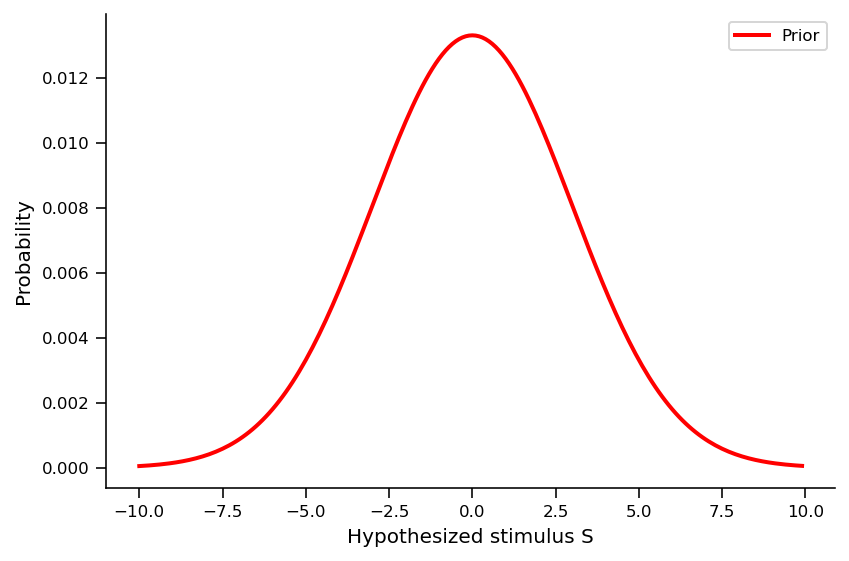

In [69]:
# prior
my_plot_single(x, prior, 'red', 'Prior')

<ipython-input-65-82c2507e2209>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, px, '-', color=col, LineWidth=2, label=name)


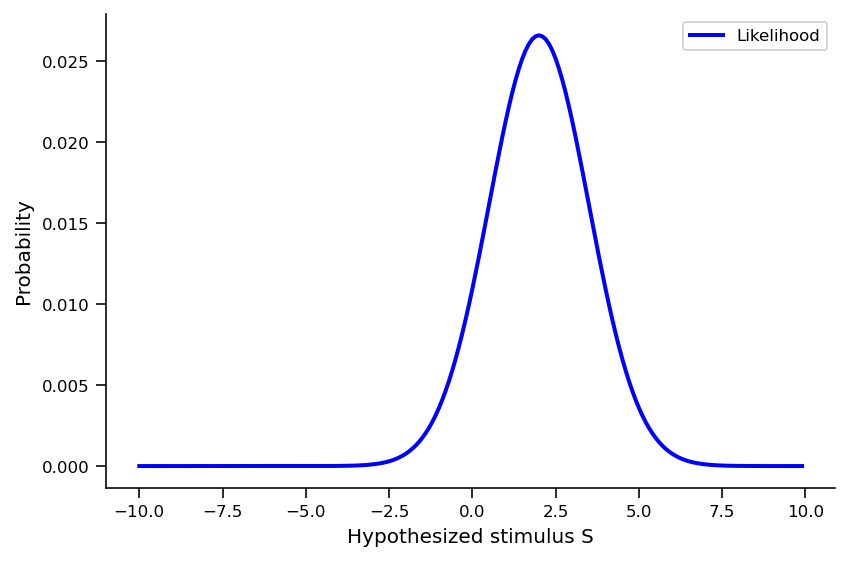

In [70]:
#  Likelihood
my_plot_single(x, likelihood, 'blue', 'Likelihood')

### Question c. Show that the posterior is a new Gaussian distribution

<ipython-input-65-82c2507e2209>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x, px, '-', color=col, LineWidth=2, label=name)


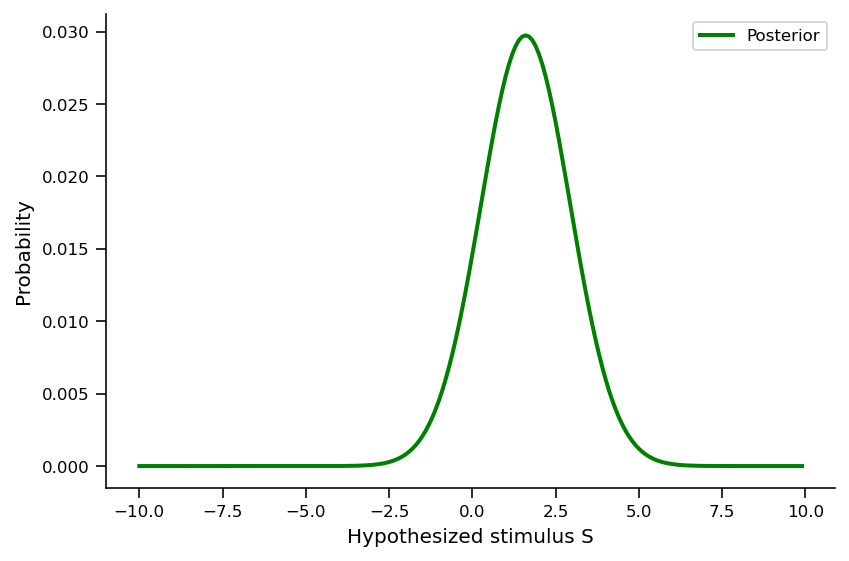

In [71]:
my_plot_single(x, posterior, 'green', 'Posterior')

### Question d. In the special case that prior_std = likelihood_std, compute the mean of the posterior.

In [72]:
coef_a = coef_b = 1/2
posterior_mean = coef_a*0 + coef_b*2
posterior_mean

1.0

### Question e.

I captured and added it separately.

### Question f. Show that the variance of the posterior is smaller than both the variance of the likelihood function and the variance of the prior distribution. This shows that combining a measurement with prior knowledge makes an observer less uncertain about the stimulus.


In [73]:
def compute_posterior_variance():

    mu_likelihood = 2
    sigma_likelihood = 1.5

    mu_prior = 0
    sigma_prior = 3

    posterior_var = ((mu_likelihood / sigma_likelihood ** 2 + mu_prior / sigma_prior ** 2) /
                (1 / sigma_likelihood ** 2 + 1 / sigma_prior ** 2))

    return posterior_var

In [74]:
posterior_var = compute_posterior_variance()

In [75]:
posterior_var

1.5999999999999999

### Qustion g. What is the variance of the posterior in the special case that prior_std = likelihood_std?

posterior_var = 1/2 * prior_std**2 = 1/2 * likelihood_std**2